In [4]:
import csv

def text_to_csv(input_filepath, output_filepath, delimiter = ';'):
    with open(input_filepath, 'r', newline = '') as infile, \
        open(output_filepath, 'w', newline = '') as outfile:
        reader = csv.reader(infile, delimiter = delimiter)
        writer = csv.writer(outfile)
        for row in reader:
            writer.writerow(row)

text_to_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/raw/household_power_consumption.txt',
            'D:/ML Projects/Smart Energy Usage Pattern Detector/data/raw/household_power_consumption.csv',
            delimiter = ';')

In [1]:
import pandas as pd

df = pd.read_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/raw/household_power_consumption.csv', low_memory = False)

print(df.shape)
df.head()

(2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
df.isnull().sum().sort_values(ascending = False)

Sub_metering_3           25979
Date                         0
Time                         0
Global_reactive_power        0
Global_active_power          0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
dtype: int64

In [3]:
(df == 0).sum()

Date                          0
Time                          0
Global_active_power           0
Global_reactive_power         0
Voltage                       0
Global_intensity              0
Sub_metering_1                0
Sub_metering_2                0
Sub_metering_3           852092
dtype: int64

In [4]:
df[(df == 0).any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
292,16/12/2006,22:16:00,2.358,0.000,237.100,9.800,0.000,0.000,0.0
293,16/12/2006,22:17:00,0.960,0.054,238.680,5.600,0.000,0.000,0.0
294,16/12/2006,22:18:00,1.606,0.000,238.760,7.800,0.000,0.000,0.0
295,16/12/2006,22:19:00,2.350,0.000,238.590,9.800,0.000,0.000,0.0
296,16/12/2006,22:20:00,2.428,0.068,238.870,10.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Combining date and time column --> Essential for time-series modeling.

In [6]:
df['datetime_combined'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format = "%d/%m/%Y %H:%M:%S")

In [7]:
df.set_index('datetime_combined', inplace = True)

In [8]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime_combined,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Handling the 'zero' values.

In [9]:
df.isna().resample('D').sum()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime_combined,,,,,,,,,
2006-12-16,0,0,0,0,0,0,0,0,0
2006-12-17,0,0,0,0,0,0,0,0,0
2006-12-18,0,0,0,0,0,0,0,0,0
2006-12-19,0,0,0,0,0,0,0,0,0
2006-12-20,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2010-11-22,0,0,0,0,0,0,0,0,0
2010-11-23,0,0,0,0,0,0,0,0,0
2010-11-24,0,0,0,0,0,0,0,0,0


In [29]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [10]:
df['all_zero_row'] = (df[['Global_active_power', 'Global_reactive_power', 'Voltage',
                          'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] == 0).all(axis = 1)

In [11]:
zero_rows = df[df['all_zero_row']]
df_cleaned = df[~df['all_zero_row']]

In [12]:
df_cleaned.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,all_zero_row
datetime_combined,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,False
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,False
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,False
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,False
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,False


In [13]:
df_cleaned['was_absent'] = df_cleaned['all_zero_row'].astype(int)

In [14]:
df_cleaned.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,all_zero_row,was_absent
datetime_combined,,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,False,0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,False,0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,False,0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,False,0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,False,0


In [15]:
df_cleaned.drop(columns = ['Date', 'Time'], inplace = True)

In [17]:
df_cleaned.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,all_zero_row,was_absent
datetime_combined,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,False,0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,False,0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,False,0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,False,0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,False,0


In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
 7   all_zero_row           bool   
 8   was_absent             int64  
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 144.5+ MB


In [24]:
df_cleaned.columns.to_list()

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'all_zero_row',
 'was_absent']

In [ ]:
cols_to_convert = [
'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2'
]

for col in cols_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors = 'coerce')

df_cleaned = df_cleaned.dropna(subset = cols_to_convert + ['Sub_metering_3'])

df_cleaned = df_cleaned[~df_cleaned['all_zero_row']]

print(df_cleaned.dtypes)
print(df_cleaned.isnull().sum())

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
all_zero_row                bool
was_absent                 int64
dtype: object
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
all_zero_row             0
was_absent               0
dtype: int64


In [28]:
print(df.shape)
df_cleaned.head()

(2075259, 10)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,all_zero_row,was_absent
datetime_combined,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,False,0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,False,0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,False,0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,False,0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,False,0


## Final Checks before proceeding to Feature Engineering.

In [35]:
print(df_cleaned.shape,"\n")
print("-----------------------------------------------------")
print(df_cleaned.dtypes,"\n")
print("-----------------------------------------------------")
print(df_cleaned.isnull().sum(),"\n")

(2049280, 9) 

-----------------------------------------------------
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
all_zero_row                bool
was_absent                 int64
dtype: object 

-----------------------------------------------------
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
all_zero_row             0
was_absent               0
dtype: int64 



In [36]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


## Distribution of key variables

In [38]:
df_cleaned.columns.to_list()

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'all_zero_row',
 'was_absent']

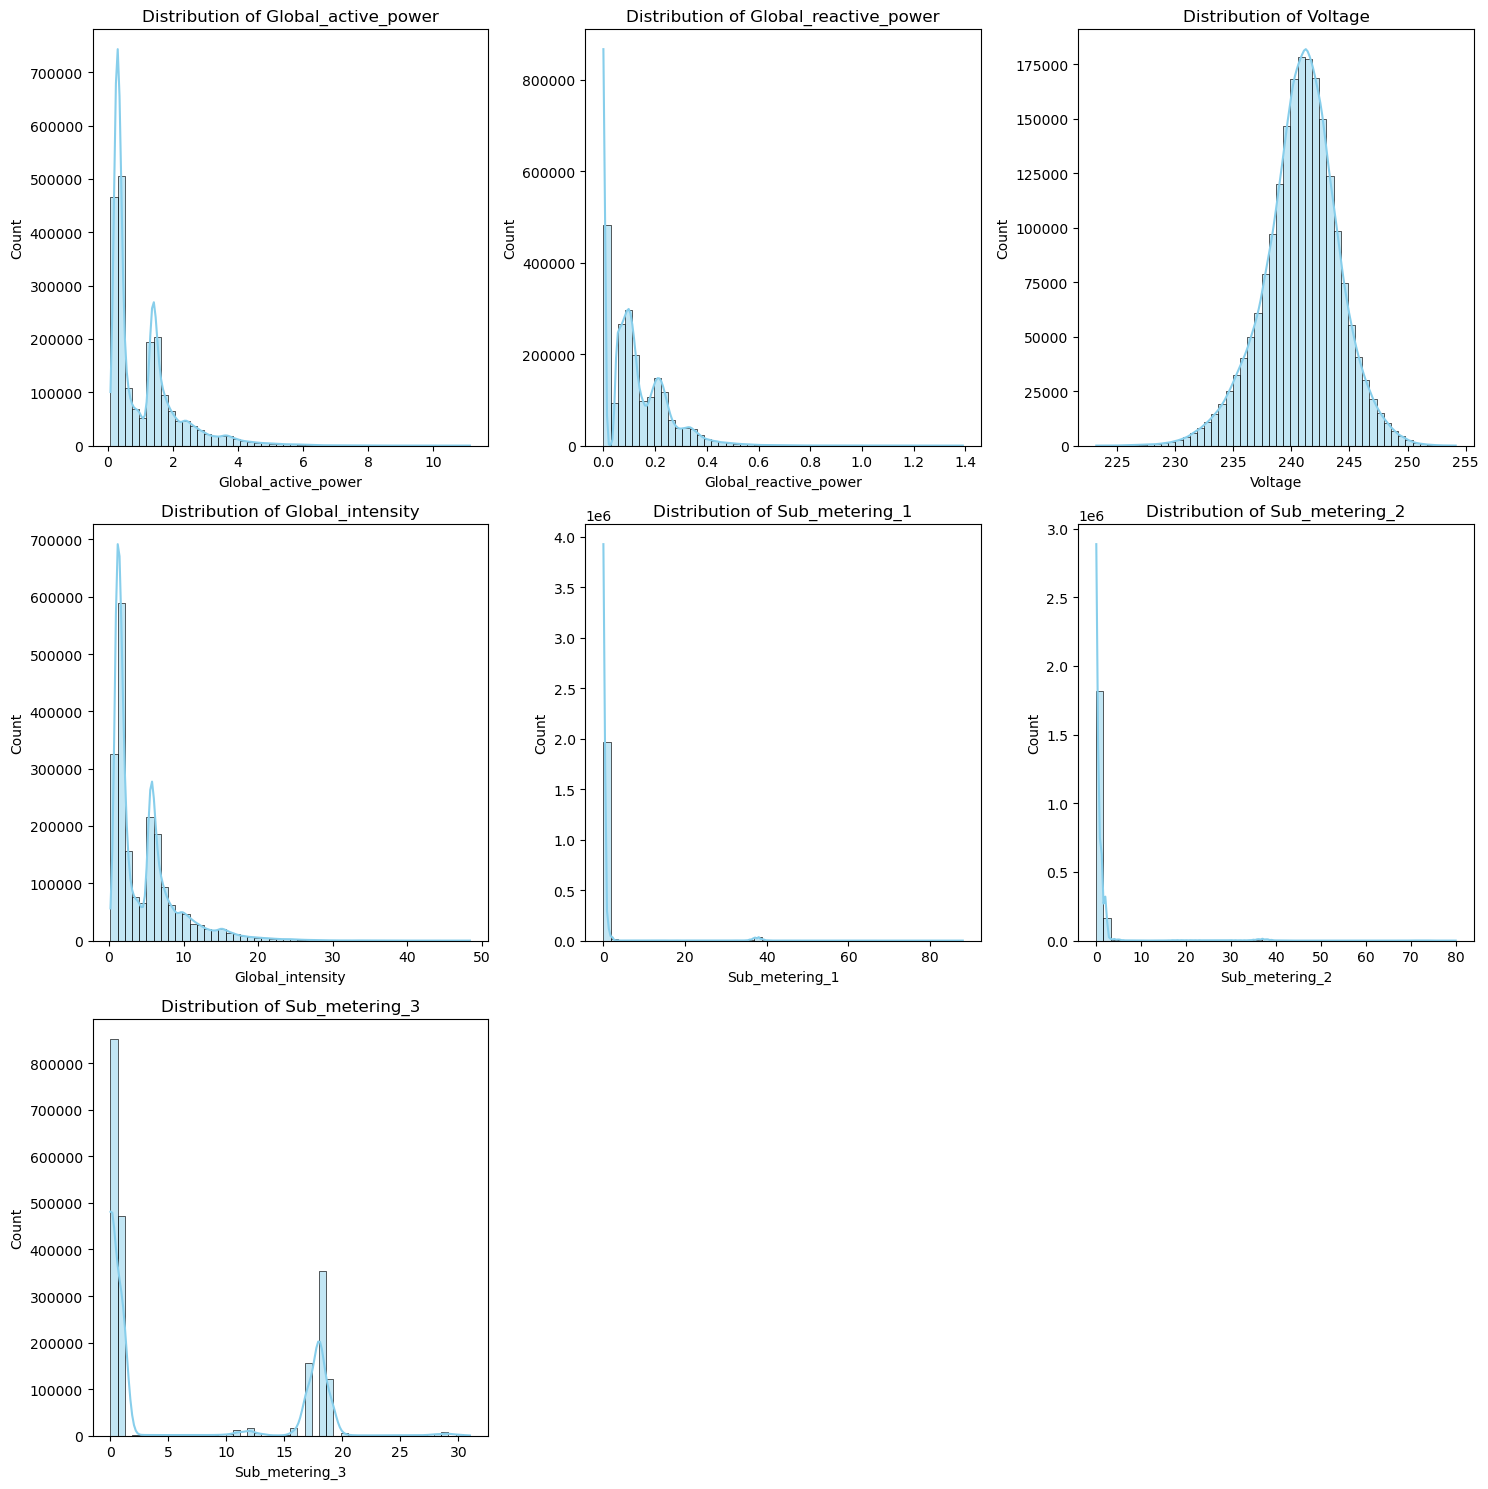

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = [
 'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3'
 ]

n = len(numerical_cols)
cols = 3
rows = math.ceil(n / cols)


plt.figure(figsize = (15, 5 * rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df_cleaned[col], bins = 50, kde = True, color = 'skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

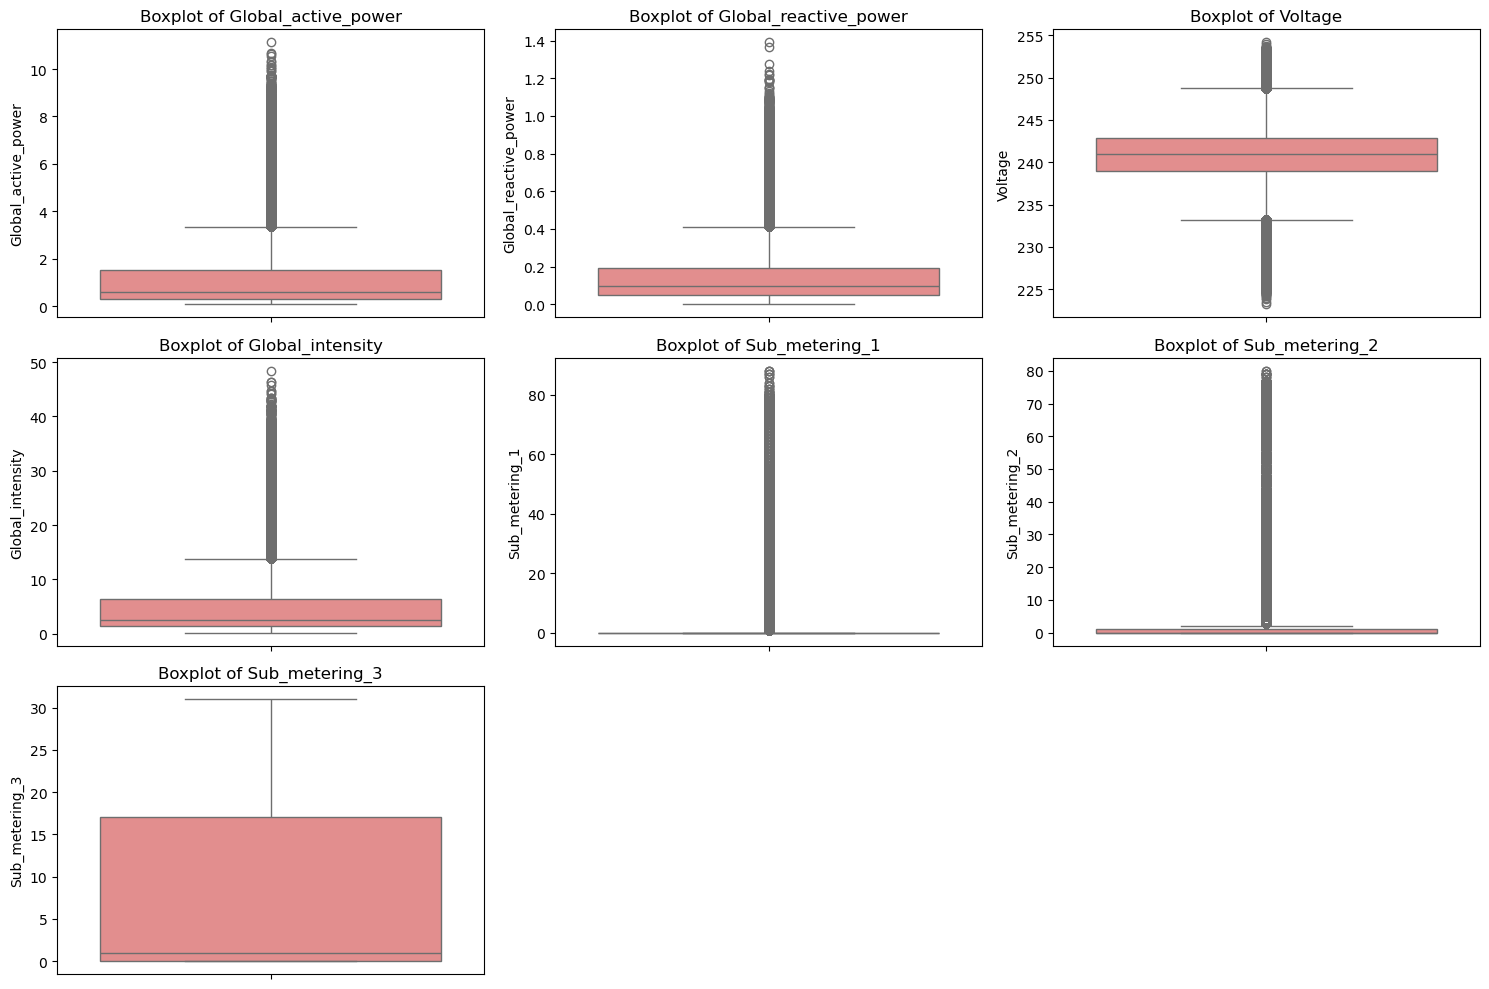

In [47]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df_cleaned[col], color = 'lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Identifying/Handling outliers.

In [49]:
outliers_info = {}

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outliers_info[col] = len(outliers)

    print(f"{col}: {len(outliers)} outliers")

Global_active_power: 94907 outliers
Global_reactive_power: 40420 outliers
Voltage: 51067 outliers
Global_intensity: 100961 outliers
Sub_metering_1: 169105 outliers
Sub_metering_2: 77151 outliers
Sub_metering_3: 0 outliers


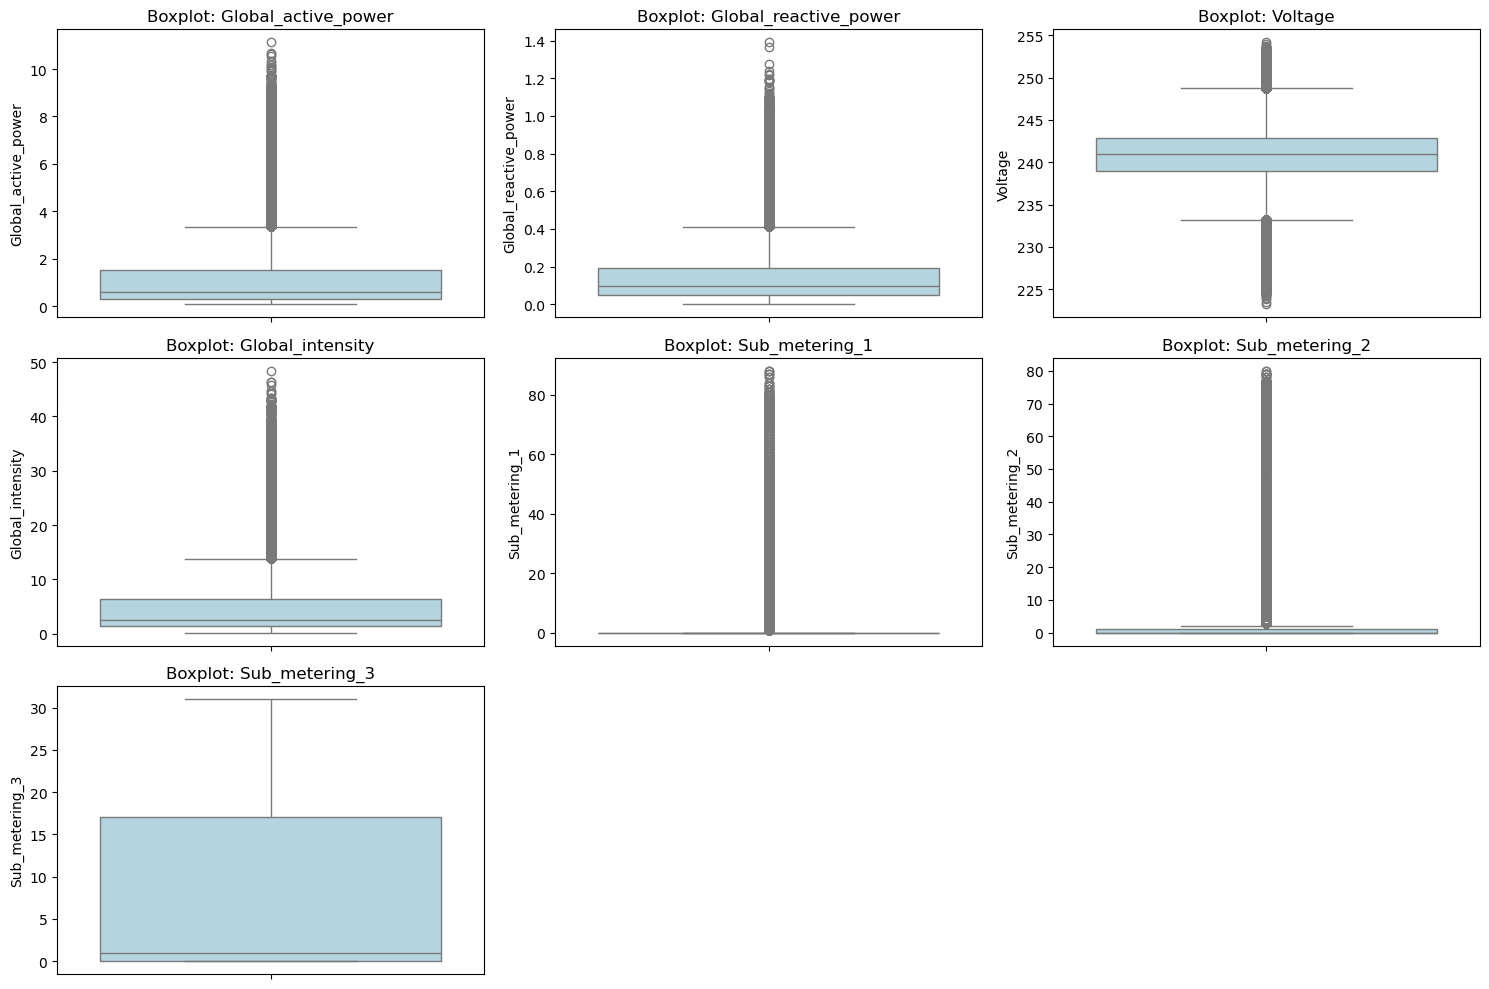

In [51]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y = df_cleaned[col], color = 'lightblue')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [52]:
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

In [53]:
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned[col] = df_cleaned[col].clip(lower = lower_bound, upper = upper_bound)

In [54]:
# Capped the outliers

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [55]:
df_cleaned.to_csv('D:/ML Projects/Smart Energy Usage Pattern Detector/data/processed/processed_data.csv')